Setup


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model, Sequential
import numpy as np
import cv2
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Get to right directory

In [ ]:
data_images = '/content/drive/MyDrive/NYU4/NYU4.1_MDL/DS301-Final-project/smartDocData_Train/'
data_gt = os.path.join(data_images, 'gt.csv')

data_dir = "/content/drive/MyDrive/NYU4/NYU4.1_MDL/DS301-Final-project"
os.chdir(data_dir)
from utils import *
print(os.getcwd())

/content/drive/MyDrive/NYU4/NYU4.1_MDL/DS301-Final-project


In [ ]:
#checking that dataset is fully uploaded
num_images = os.listdir(data_images)
print(num_images[:10])
print(len(num_images))
print(len(num_images)==16766)

FileNotFoundError: ignored

Unzip dataset zip files



In [ ]:
unzip_train = 'smartdoc_train'
unzip_test = 'smartdoc_test'
ut_path = os.path.join(data_dir, unzip_train)
ute_path = os.path.join(data_dir, unzip_test)

!unzip smartDocData_DocTrainC.zip -d smartdoc_train
!unzip smartDocData_DocTestC.zip -d smartdoc_test


Streaming output truncated to the last 5000 lines.
  inflating: smartdoc_train/smartdocData_DocTrainC/background01datasheet002.avi192.jpg  
  inflating: smartdoc_train/smartdocData_DocTrainC/background05letter001.avi014.jpg  
  inflating: smartdoc_train/smartdocData_DocTrainC/background01datasheet002.avi186.jpg  
  inflating: smartdoc_train/smartdocData_DocTrainC/background02magazine001.avi114.jpg  
  inflating: smartdoc_train/smartdocData_DocTrainC/background02paper001.avi253.jpg  
  inflating: smartdoc_train/smartdocData_DocTrainC/background04magazine002.avi021.jpg  
  inflating: smartdoc_train/smartdocData_DocTrainC/background05magazine003.avi024.jpg  
  inflating: smartdoc_train/smartdocData_DocTrainC/background01patent001.avi105.jpg  
  inflating: smartdoc_train/smartdocData_DocTrainC/background04patent001.avi077.jpg  
  inflating: smartdoc_train/smartdocData_DocTrainC/background02letter001.avi039.jpg  
  inflating: smartdoc_train/smartdocData_DocTrainC/background04paper003.avi055


Fixing csv

In [ ]:
def cleanCSV(src, dest):
  srcread = open(src, 'r')
  rws = srcread.readlines()
  srcread.close()

  charstorem = list('|()[] ')
  for i in range(len(rws)):
    for ch in charstorem:
      rws[i] = rws[i].replace(str(ch), '')
  
  destwrite = open(dest, 'w')
  for rw in rws:
    destwrite.write(rw)
  destwrite.close()

In [ ]:
trainPath = os.path.join(data_dir, 'smartDocData_DocTrainC')
testPath = os.path.join(data_dir, 'smartDocData_DocTestC')
cleanCSV(os.path.join(trainPath, 'gt.csv'),os.path.join(trainPath, 'gtClean.csv'))
cleanCSV(os.path.join(testPath, 'gt.csv'),os.path.join(testPath, 'gtClean.csv'))

In [ ]:
trainGtread = open(data_gt,'r')
rws = trainGtread.readlines()
trainGtread.close()
charstorem = list('|()[] ')
for i in range(len(rws)):
  for ch in charstorem:
    rws[i] = rws[i].replace(str(ch), '')
print(rws[0])

trainGtwrite = open(os.path.join(data_dir, 'gtClean.csv'),'w')
for rw in rws:
  trainGtwrite.write(rw)
trainGtwrite.close()


background02letter003.avi189.jpg,0.1537,0.314,0.5605,0.3698,0.5379,0.8791,0.0328,0.7977



['background02letter003.avi189.jpg', '0.1537', '0.314', '0.5605', '0.3698', '0.5379', '0.8791', '0.0328', '0.7977']
(64, 64, 3)


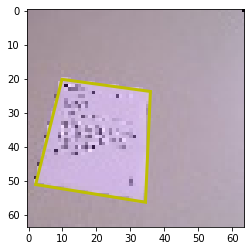

In [ ]:
trDat = open(os.path.join(trainPath, 'gtClean.csv'),newline='\n')
import csv
trDatR = csv.reader(trDat)
fline = trDatR.__next__()
print(fline)

frame1 = cv2.imread(os.path.join(trainPath,fline[0]))
frame1 = cv2.cvtColor(frame1, cv2.COLOR_RGB2BGR)
print(frame1.shape)
bbox = np.array(fline[1:]).astype('float')*64
bbox = np.reshape(bbox, (4,2))
plot_with_box(frame1, bbox)